## Task 2 : Prediction using Unsupervised ML

### Name : Sampada Suryawanshi

### Objective : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
##Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [2]:
# Load the iris dataset
iris = pd.read_csv("C:\\Users\\dell\\Downloads\\Iris.csv")
print(len(iris))
iris.head(3)

150


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
type(iris)

pandas.core.frame.DataFrame

In [4]:
print("Dimension of Dataset is:",iris.shape)
###(rows,coloum)

Dimension of Dataset is: (150, 6)


### checking for null value

In [5]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [8]:
##tacking care of null values
iris.isna().sum()
print("Total count of missing values in our dataset is: ",iris.isna().sum().sum())

Total count of missing values in our dataset is:  0


###### As we can see that there are no missing values in our dataset.

### Describing the data

In [9]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### Visualizing the data

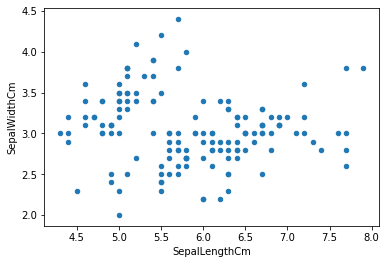

In [11]:
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

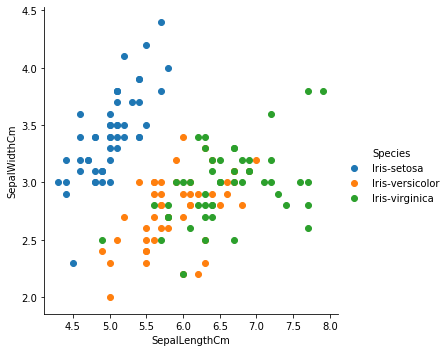

In [12]:
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()


    From  this we can comment that cluster analysis is possible for this data.Since we can see that different species are scattered in different region of the graph,it means that we can form at least 2 clusters for this. on contrary,if all these points are more or less overlapping,it means we can have only one cluster for this data(which does not make sense)

### This is Clustring problem.

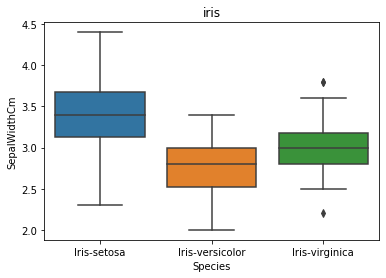

In [13]:
sns.boxplot(x="Species",y="SepalWidthCm",data=iris)
plt.title("iris")
plt.show()

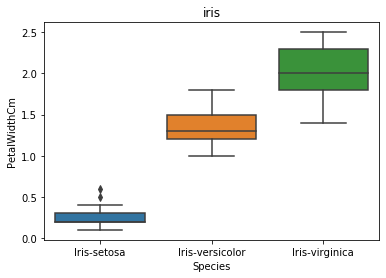

In [14]:
sns.boxplot(x="Species",y="PetalWidthCm",data=iris)
plt.title("iris")
plt.show()

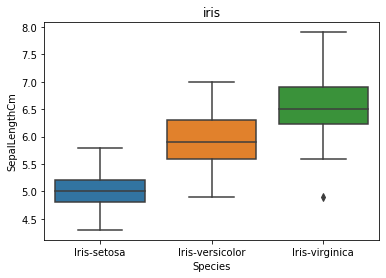

In [15]:
sns.boxplot(x="Species",y="SepalLengthCm",data=iris)
plt.title("iris")
plt.show()

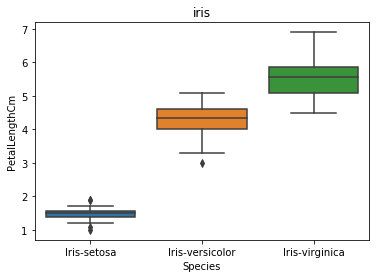

In [16]:
sns.boxplot(x="Species",y="PetalLengthCm",data=iris)
plt.title("iris")
plt.show()

### Determining the optimum number of classes using elbow method 

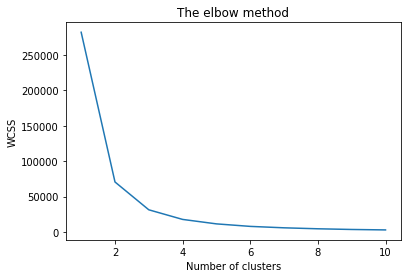

In [17]:
# Finding the optimum number of clusters for k-means classification

x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

##### From the graph above,we can clearly see that Optimum number of cluster are 3

In [18]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

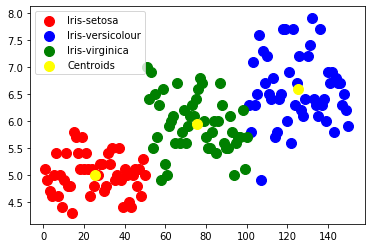

In [19]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

##### Hence,for the Iris data we can have 3 clusters.This will be the optimum value for number of clusters,since using 3 centriods we can easily divide whole dataset in almost non overlapping regions.